
### 5. Exploratory Data Analysis
In this step, I dove into the cleaned and feature-enhanced data to uncover patterns and insights:

- **Univariate Distributions**: I plotted histograms of player ages and boxplots of market value by position to see how age and role influence value.
- **Bivariate Relationships**: I created a scatter plot of price vs. age and a correlation heatmap of key numeric features to explore how variables interact.
- **Key Insights**: Within the notebook, I noted observations such as the age range where valuations peak, positional value trends, and the strength of relationships between tenure and market value.

All of this is organized in a Jupyter notebook (`notebooks/04_exploratory_analysis.ipynb`) that contains code cells, visual outputs, and markdown commentary.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature‐enhanced data
df = pd.read_csv('../data/processed/players_features.csv',
                 parse_dates=['joined_club','contract_expires'])


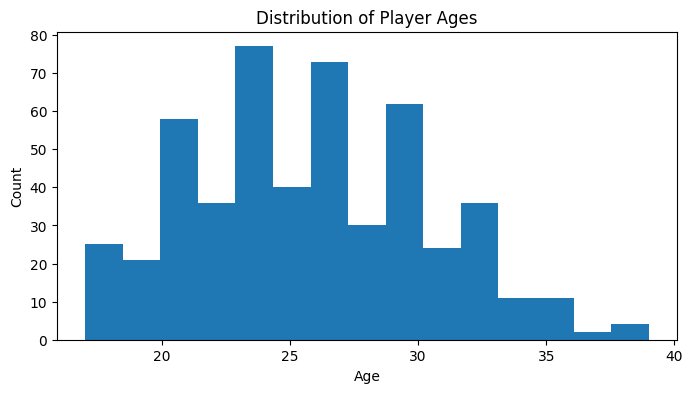

In [2]:
plt.figure(figsize=(8,4))
plt.hist(df['age'], bins=15)
plt.title("Distribution of Player Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/var/folders/dd/l05_zbd51d7211wc0xh8v9b00000gn/T/ipykernel_33344/1912277761.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=positions, showfliers=False)


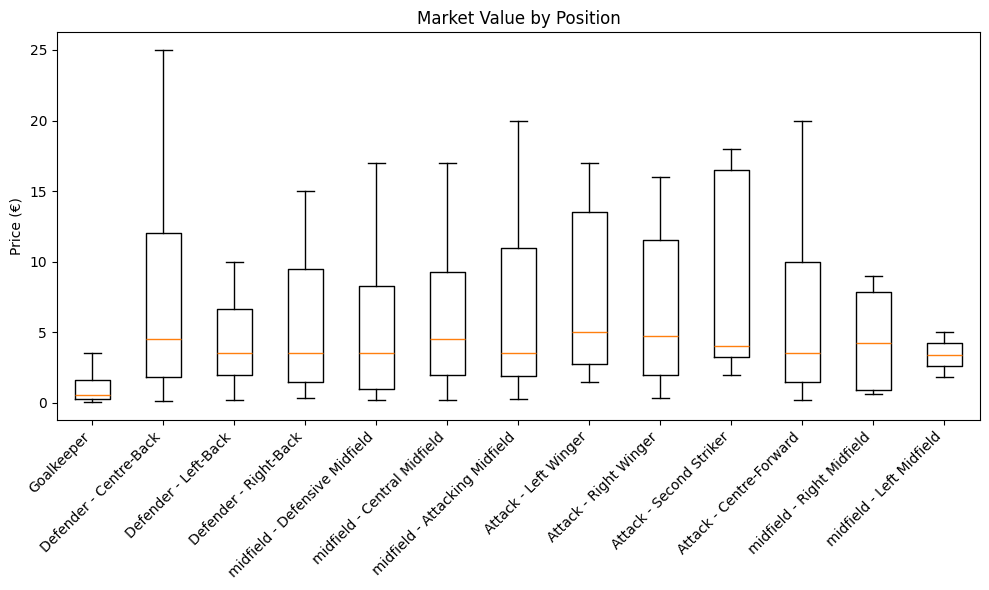

In [3]:
positions = df['position'].unique()
data = [df.loc[df['position']==pos, 'price_eur'] for pos in positions]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=positions, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title("Market Value by Position")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.show()


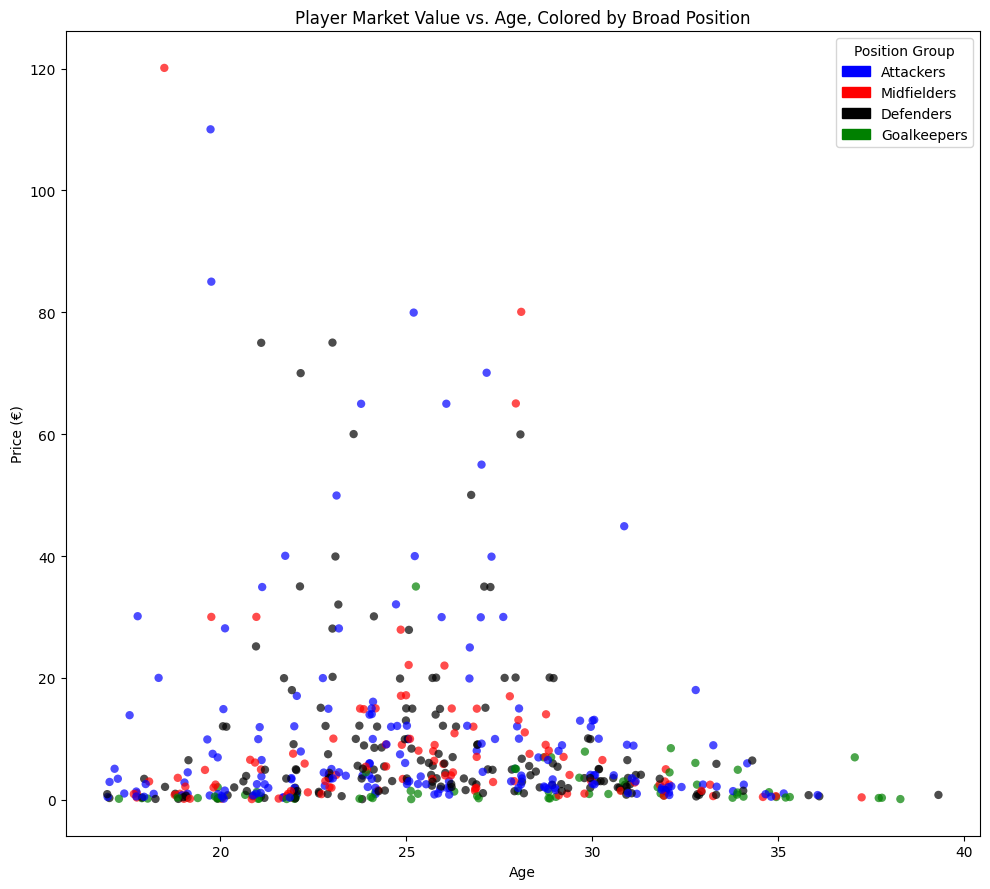

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def pos_to_color(pos):
    p = pos.lower()
    if 'forward' in p or 'wing' in p or 'attack' in p:
        return 'blue'
    elif 'midfield' in p:
        return 'red'
    elif 'defender' in p or 'back' in p:
        return 'black'
    elif 'keeper' in p or 'goal' in p:
        return 'green'
    else:
        return 'gray'


x = df['age'] + np.random.normal(0, 0.2, size=len(df))
y = df['price_eur'] + np.random.normal(0, df['price_eur'].std()*0.005, size=len(df))

colors = df['position'].apply(pos_to_color)

plt.figure(figsize=(10,9))
plt.scatter(x, y, c=colors, alpha=0.7, edgecolors='none')
plt.title("Player Market Value vs. Age, Colored by Broad Position")
plt.xlabel("Age")
plt.ylabel("Price (€)")

# 5) Legend
patches = [
    mpatches.Patch(color='blue', label='Attackers'),
    mpatches.Patch(color='red',   label='Midfielders'),
    mpatches.Patch(color='black', label='Defenders'),
    mpatches.Patch(color='green', label='Goalkeepers'),
]
plt.legend(handles=patches, title="Position Group")
plt.tight_layout()
plt.show()


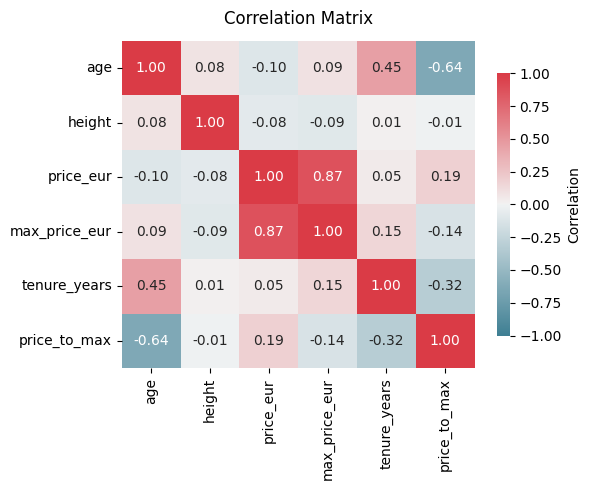

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
num_cols = ['age','height','price_eur','max_price_eur','tenure_years','price_to_max']
corr = df[num_cols].corr()

# Plot with a custom diverging palette
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    center=0,
    cbar_kws={"shrink": .8, "label": "Correlation"}
)
plt.title("Correlation Matrix", pad=12)
plt.tight_layout()
plt.show()
